# IMPORTING REQUIRED MODULES:

In [1]:
import numpy as np # library to handle data in a vectorized manner
import os
import pandas as pd # library for data analsysis
# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
file = "C:/Users/ANIKET GAIKWAD/Desktop/matches.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# RENAMING TEAMS WITH THEIR ABBREVIATION:

In [29]:
df =df.replace('Sunrisers Hyderabad', 'SRH')
df =df.replace('Royal Challengers Bangalore', 'RCB')
df =df.replace('Mumbai Indians', 'MI')
df =df.replace('Rising Pune Supergiant', 'RPS')
df =df.replace('Gujarat Lions', 'GL')
df =df.replace('Kings XI Punjab', 'KXIP')
df =df.replace('Kolkata Knight Riders', 'KKR')
df =df.replace('Chennai Super Kings', 'CSK')
df =df.replace('Deccan Chargers', 'DC')
df =df.replace('Pune Warriors', 'PWI')
df =df.replace('Kochi Tuskers Kerala', 'KT')
df =df.replace('Rajasthan Royals', 'RR')
df=df.replace('Delhi Daredevils', 'DD')
df =df.replace('Rising Pune Supergiants', 'RPS')

df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# ANALYSING DATA:


In [5]:
df['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Abu Dhabi          7
Cuttack            7
Ranchi             7
Cape Town          7
Sharjah            6
Raipur             6
Kochi              5
Indore             5
Kanpur             4
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [6]:
df[['winner','team1','team2','toss_winner']].head(10)

,winner,team1,team2,toss_winner
0,SRH,SRH,RCB,RCB
1,RPS,MI,RPS,RPS
2,KKR,GL,KKR,KKR
3,KXIP,RPS,KXIP,KXIP
4,RCB,RCB,DD,RCB
5,SRH,GL,SRH,SRH
6,MI,KKR,MI,MI
7,KXIP,RCB,KXIP,RCB
8,DD,DD,RPS,RPS
9,MI,SRH,MI,MI


In [7]:
df['winner'].value_counts()

MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
RR      63
DD      62
SRH     42
DC      29
RPS     15
GL      13
PWI     12
KT       6
Name: winner, dtype: int64

In [8]:
df['team1'].value_counts() 

MI      82
KXIP    77
CSK     77
RCB     70
KKR     68
DD      63
RR      54
SRH     46
DC      43
PWI     20
RPS     15
GL      14
KT       7
Name: team1, dtype: int64

In [9]:
df['team2'].value_counts()

DD      84
RCB     82
KKR     80
MI      75
KXIP    71
RR      64
CSK     54
DC      32
SRH     30
PWI     26
GL      16
RPS     15
KT       7
Name: team2, dtype: int64

In [10]:
df['player_of_match'].value_counts().head(20).plot(kind = 'pie',figsize=(8,8))

# NO. OF WINS IN THE IPL FOR ALL TEAMS:

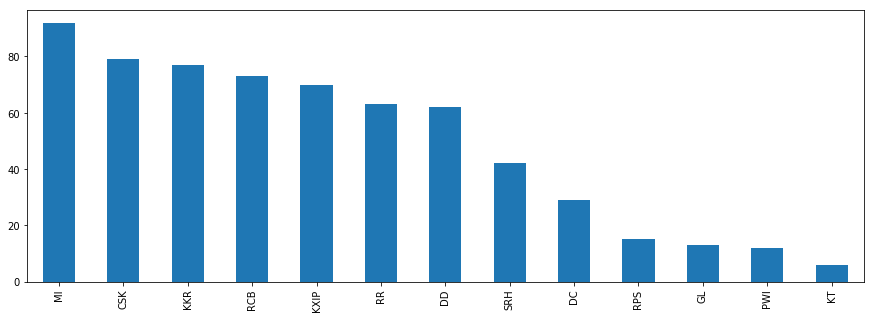

In [11]:
df['winner'].value_counts().plot(kind = 'bar',figsize=(15,5))

# CREATING A DATASET FOR MUMBAI INDIANS:

In [12]:
dfmi1 = df[df['team1']=='MI'].head(100)
dfmi2 = df[df['team2']=='MI'].head(100)
dfmi = pd.concat([dfmi1,dfmi2])
dfmotm = dfmi[dfmi['winner']=='MI'].head(100)
dfmi['player_of_match'].value_counts()
dfmi.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
23,24,2017,Mumbai,2017-04-22,MI,DD,DD,field,normal,0,MI,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
46,47,2017,Hyderabad,2017-05-08,MI,SRH,MI,bat,normal,0,SRH,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
52,53,2017,Kolkata,2017-05-13,MI,KKR,KKR,field,normal,0,MI,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN


In [13]:
dfmic = dfmi[['season','city','date','team1','team2','toss_winner','toss_decision','result','winner','venue']].head(200)

# MUMBAI INDIANS AT HOME:

In [14]:
dfmihome = dfmic[dfmic['city']=='Mumbai']

In [15]:
dfmihome.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,venue
23,2017,Mumbai,2017-04-22,MI,DD,DD,field,normal,MI,Wankhede Stadium
62,2008,Mumbai,2008-04-20,MI,RCB,MI,bat,normal,RCB,Wankhede Stadium
71,2008,Mumbai,2008-04-27,MI,DC,DC,field,normal,DC,Dr DY Patil Sports Academy
81,2008,Mumbai,2008-05-04,MI,DD,DD,field,normal,MI,Dr DY Patil Sports Academy
175,2010,Mumbai,2010-03-13,MI,RR,MI,bat,normal,MI,Brabourne Stadium


In [16]:
dfmitoss= dfmihome[dfmihome['toss_winner']=='MI'].head(100)

In [30]:
dfmiwin = dfmitoss[dfmitoss['winner']=='MI'].head(100)
dfmiwin.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,venue
175,2010,Mumbai,2010-03-13,MI,RR,MI,bat,normal,MI,Brabourne Stadium
206,2010,Mumbai,2010-04-03,MI,DC,MI,bat,normal,MI,Brabourne Stadium
220,2010,Mumbai,2010-04-13,MI,DD,MI,bat,normal,MI,Brabourne Stadium
230,2010,Mumbai,2010-04-21,MI,RCB,MI,bat,normal,MI,Dr DY Patil Sports Academy
389,2013,Mumbai,2013-04-09,MI,DD,MI,bat,normal,MI,Wankhede Stadium


In [18]:
dfmiwin['toss_decision'].value_counts()

field    14
bat      12
Name: toss_decision, dtype: int64

In [19]:
dfmi1=dfmi1[['season','city','date','team1','team2','toss_winner','toss_decision','result','winner','venue']].head(200)


In [20]:
dfmi1['team2'].value_counts() 

DD      15
CSK     12
RCB     11
RR      10
KKR      9
KXIP     7
DC       5
SRH      4
RPS      3
PWI      3
GL       2
KT       1
Name: team2, dtype: int64

In [21]:
dfmi1win = dfmi1[dfmi1['winner']=='MI']


In [22]:
dfmi1win['team2'].value_counts() 

DD      9
CSK     7
KKR     6
RR      6
RCB     6
DC      4
KXIP    4
PWI     3
RPS     1
SRH     1
Name: team2, dtype: int64

In [23]:
dfmi2=dfmi2[['season','city','date','team1','team2','toss_winner','toss_decision','result','winner','venue']].head(200)


In [24]:
dfmi2['team1'].value_counts()

KXIP    13
KKR     12
CSK     10
RCB     10
RR       6
SRH      6
DD       5
DC       5
RPS      3
PWI      3
GL       2
Name: team1, dtype: int64

In [25]:
dfmi2win = dfmi2[dfmi2['winner']=='MI']


In [26]:
dfmi2win['team1'].value_counts()

KKR     10
RCB      7
KXIP     6
CSK      5
RR       4
SRH      4
PWI      2
GL       2
DC       2
DD       2
RPS      1
Name: team1, dtype: int64

In [27]:
dfmi2win['team1'].value_counts() + dfmi1win['team2'].value_counts() 

CSK     12.0
DC       6.0
DD      11.0
GL       NaN
KKR     16.0
KXIP    10.0
PWI      5.0
RCB     13.0
RPS      2.0
RR      10.0
SRH      5.0
dtype: float64

In [28]:
dfmi2['team1'].value_counts() + dfmi1['team2'].value_counts() 

CSK     22.0
DC      10.0
DD      20.0
GL       4.0
KKR     21.0
KT       NaN
KXIP    20.0
PWI      6.0
RCB     21.0
RPS      6.0
RR      16.0
SRH     10.0
dtype: float64